# Regression Analysis for Various Datasets
In this notebook, we look different regression problems and hope to achieve sufficient knowledge to implement any regression based machine learning by ourselves.
Towards this, we look into the detailed coding from the theory and then use the existing library to implement them efficiently!

Created by: Dr. Tida

Revised by: Madhava

## Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [110]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Import Required Libraries

In [111]:
!pip install chart_studio
import numpy as np
import pandas as pd
import seaborn as sns
import plotly 
%matplotlib inline
import chart_studio.plotly as py
import matplotlib.pyplot as plt
from matplotlib import style
from zipfile import ZipFile
import math
from random import seed
from random import random


## Datasets from Kaggle

In [112]:
#run to import files or token from kaggle
from google.colab import files
files.upload()

{}

In [0]:
# Install Kaggle library
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

!chmod 600 /root/.kaggle/kaggle.json
!cp kaggle.json ~/.kaggle/

# Regression Methods in Machine Learning

## Plot() function 

In [0]:
def Plot(input1,predicted_output1,output1,title,flag,x_label='$x$',y_label='$y$'):
    plt.figure(figsize=(10,10))
    plt.xlabel(x_label,**axis_font)
    plt.ylabel(y_label,**axis_font)
    plt.title(title,**title_font)
    #plt.gca().set_aspect(1, adjustable='datalim')
    # The flags pivots between the mutivariate data or a single variable data
    if(flag == True):
        input2=input1[:][:,1]
    else:
        input2=input1
    plt.plot(input2, output1,'.', input2, predicted_output1)
    #plt.plot( input2, output1,'.')
    plt.show()


## PredictOutput() function

In [0]:
# Predict ouput using linear regression
def predictOutput(input, weights):
    return np.dot(input,weights)

## CalculateLoss() funciton

In [0]:
# Calculate the loss with the predicted output
def calculateLoss (input, weights, output,alpha=0,beta=0):
  predicted_output = predictOutput(input,weights)
  weights_new=np.copy(weights)
  weights_new[0][0]=0
  loss=np.power((predicted_output-output),2).mean()/2+(alpha*(1-beta)*np.power(weights_new,2)+alpha*beta*np.sign(weights_new)).mean()
  return (loss)

## Normalize() Function

In [0]:
def Normalize(input):
    #inputs = inputs / np.linalg.norm(inputs.transpose())
    input=(input-input.min(axis=0))/(input.max(axis=0)-input.min(axis=0))   #normalize(input,norm='l1',axis=0)
    return input
#x_train = Normalize(x_train)
#x_test = Normalize(x_test)

## Simple Linear Regression
Here, the input vector is single value x and the target variable is y

$\therefore y_{pred}=b_0 + w_1 x$

Assume just Residual sum of squares (or total sum of squares) as our loss function then

$L=\frac{1}{2N} \sum_{i=1}^N (y_{pred}-y)^2$

$\frac{\partial L}{\partial w_1}= \frac{1}{N} \big[\sum_{i=1}^N (y_{pred}-y)\big]x$


$\frac{\partial L}{\partial b}= \frac{1}{N}\big[\sum_{i=1}^N (y_{pred}-y)\big]$

## Attributes of the function Linear Regression

*   Input --  is a matrix of the size header of all independent variables or features 

    1) it has one column with dependent variable and the rest with the independent variables.
   
    2) Assume input is array with float values and it takes in the regression values form the kaggle

    3) Input is the column x in the kaggle dataset

*   Weight -- is a vector or a matrix of the size of the input's independednt variables

*   Batch_size -- Summarize the losses of inputs from the batch size 
*   lamda -- is a hyperparameters for the weight updates
*   alpha and beta -- are the hyperparameters for the $L_1-L_2$ weight regularization
*   epoch_num -- dictate how many weight update are done throughout the calculations
*    Output -- is a expected values or true value for the independent variables




## Regression Training Function()

In [0]:
def linearRegressionTraining(input,  output, batch_size=1, lamda=0.01, alpha=0, beta=0, epoch_num=1):
    loss = []
    #print(input)
    #weights=np.random.rand(len(input.transpose()),1)
    x,y=input.shape
    weights = np.random.rand(y,1)
    #weights = np.column_stack((np.ones(len(weights)), input))

    #input=(input-input.min(axis=0))/(input.max(axis=0)-input.min(axis=0))#normalize(input,norm='l1',axis=0)
    #input = input/np.linalg.norm(input)
    #input = np.column_stack((np.ones(len(output)), input))
    #print(f"input vector: {input}")
    for iter in range(epoch_num):
        for batch_iter in range(math.ceil(len(output)/batch_size)):
            if batch_iter*batch_size<len(output):
                input_matrix = input[batch_iter*batch_size:(batch_iter+1)*batch_size][:]
                #print("input_matrix",input_matrix.shape)
                output_matrix = output[batch_iter*batch_size:(batch_iter+1)*batch_size]
                #print("output_matrix",output_matrix.shape)
            else:
                input_matrix = input[batch_iter*batch_size:len(output)]
                output_matrix = output[batch_iter*batch_size:len(output)]
            
            output_predicted = np.dot(input_matrix,weights)
            #print("output_predicted",output_predicted.shape)
            #print(f"weights: {weights}")
            weights_bias=np.copy(weights)
            
            weights_bias[0][0]=0
    
            
            #gradient=lamda*((np.multiply(output_predicted-output_matrix, input_matrix).mean(axis=0)).transpose() + alpha*(1-beta)*2*weights_bias+alpha*beta*np.sign(weights_bias))
            gradient = lamda*((np.dot((output_predicted-output_matrix).transpose(),input_matrix)).transpose() + alpha*(1-beta)*2*weights_bias+alpha*beta*np.sign(weights_bias))
     
            #print(f"gradient:{gradient}")
            weights = np.subtract(weights,gradient)
            #print(f"new weights: {weights}")
            #print(f"error after upgrade:{predictOutput(input_matrix,weights)-output_matrix}")
            loss.append(calculateLoss(input_matrix,weights, output_matrix,alpha,beta))
        
        if (iter%25 ==0):
            print(f"Iteration: {iter+1}, Loss = {np.mean(loss)}")
    
    #Plot(input,predictOutput(input,weights),output,"") 
    #print(f'Final weights = {weights} \n Final Loss = {calculateLoss(input_matrix,weights, output_matrix)}')
    return weights

## Regression Testing function()

In [0]:
def linearRegressionTest(input,weights,output,alpha, beta):
    #input=(input-input.min(axis=0))/(input.max(axis=0)-input.min(axis=0))   # Normailizng step
    #input = np.column_stack((np.ones(len(output)), input))                  # Adding bias column in the start
    output_predicted = predictOutput(input,weights)
    #loss=calculateLoss(input,weights, output, alpha, beta)
    loss=Loss(output, output_predicted) 
    return loss

## Loss() function

In [0]:
def Loss (output,predicted_output):
  #loss=np.power((predicted_output-output),2).mean()/2
  loss=(np.absolute((predicted_output - output)/output)).mean()
  return loss

## Define Hyper Parameters

In [0]:
lamda=0.01     # learning Rate
alpha = 0
beta = 0
batch_size=5
epoch_num=500

## Dataset 1
https://www.kaggle.com/andonians/random-linear-regression

We use this randomly generated data to characterize different algorithms

In [184]:
# Find API from Kaggle and use it here directly.
!kaggle datasets download -d andonians/random-linear-regression

random-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
# Unzip to obtain Data

zip_file = ZipFile('/content/random-linear-regression.zip')
fields = ['x','y']

train_data = pd.read_csv(zip_file.open('train.csv'))
train_data.head()
test_data = pd.read_csv(zip_file.open('test.csv'),usecols=fields)
test_data.head()

# Drop any NaN values in the dataset
train_data=train_data.dropna()
test_data=test_data.dropna()


##Creating Test and Train Datasets

In [0]:
input = np.asmatrix(train_data.iloc[:,0].values).transpose()
outputs = (np.asmatrix(train_data.iloc[:,1].values)).transpose()
#input=(input-input.min(axis=0))/(input.max(axis=0)-input.min(axis=0))   #normalize(input,norm='l1',axis=0)
input=Normalize(input)
input = np.column_stack((np.ones(len(outputs)), input))

Iteration: 1, Loss = 229.82786198422104
Iteration: 26, Loss = 16.87980694619156
Iteration: 51, Loss = 10.490799896861764
Iteration: 76, Loss = 8.305086948996642
Iteration: 101, Loss = 7.201410113935966
Iteration: 126, Loss = 6.5357002769152395
Iteration: 151, Loss = 6.090424160762304
Iteration: 176, Loss = 5.771646941243725
Iteration: 201, Loss = 5.532167537525788
Iteration: 226, Loss = 5.345670302771996
Iteration: 251, Loss = 5.196323911594657
Iteration: 276, Loss = 5.074033026065386
Iteration: 301, Loss = 4.972056241122373
Iteration: 326, Loss = 4.885720067366939
Iteration: 351, Loss = 4.811682493861566
Iteration: 376, Loss = 4.747490342364887
Iteration: 401, Loss = 4.6913021997830056
Iteration: 426, Loss = 4.641708909616837
Iteration: 451, Loss = 4.597613766919203
Iteration: 476, Loss = 4.558150466941908


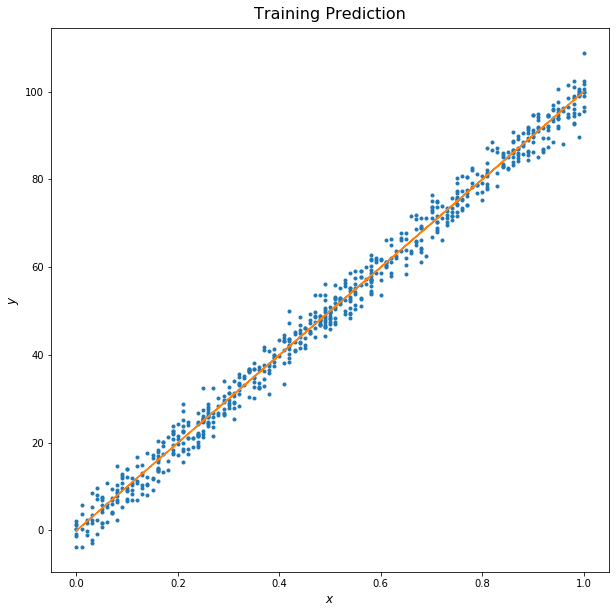

In [187]:
title_font = { 'size':'16', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'size':'12'}
weights_learned=linearRegressionTraining(input,outputs, batch_size, lamda, alpha, beta, epoch_num);
pred_output = predictOutput(input,weights_learned)
Plot(input,pred_output,outputs,"Training Prediction",True)

In [188]:
input_test = np.asmatrix(test_data.iloc[:,0].values).transpose()
outputs_test = (np.asmatrix(test_data.iloc[:,1].values)).transpose()
input_test = Normalize(input_test)
input_test = np.column_stack((np.ones(len(outputs_test)), input_test)) 

#Predicting the outcome

y_test_predicted = predictOutput(input_test,weights_learned) 
print("The Loss from our Model is ",Loss(y_test_predicted,outputs_test))
#print(linearRegressionTest(input_test,weights_learned,outputs_test,alpha,beta))

The Loss from our Model is  0.4807428872060308


# Using the Scikit model for creating the regression Models and Learning

In [0]:
from sklearn.linear_model import LinearRegression     # Implementing the simple Linear Regression
from sklearn.model_selection import train_test_split

## Creating the Train and Test Data

In [0]:
# The input data in the x and y fields
x_train = np.array(train_data.iloc[:,0].values)
y_train = np.array(train_data.iloc[:,1].values)
x_test = np.array(test_data.iloc[:,0].values)
y_test = np.array(test_data.iloc[:,1].values)

# change the array format 
x_train = x_train.reshape(len(x_train),1)
y_train = y_train.reshape(len(y_train),1)
x_test = x_test.reshape(len(x_test),1)
y_test = y_test.reshape(len(y_test),1)


# Normalizing the Input
x_train = Normalize(x_train)
x_test = Normalize(x_test)

# Realizing the Code

In [0]:
Reg=LinearRegression().fit(x_train,y_train)

## Flags to Check if the lenghts input_data with outcome match

In [0]:
if(len(x_test)!=len(y_test)):
    print("The sizes do not match")
if(len(x_train)!=len(y_train)):
    print("The sizes do not match")

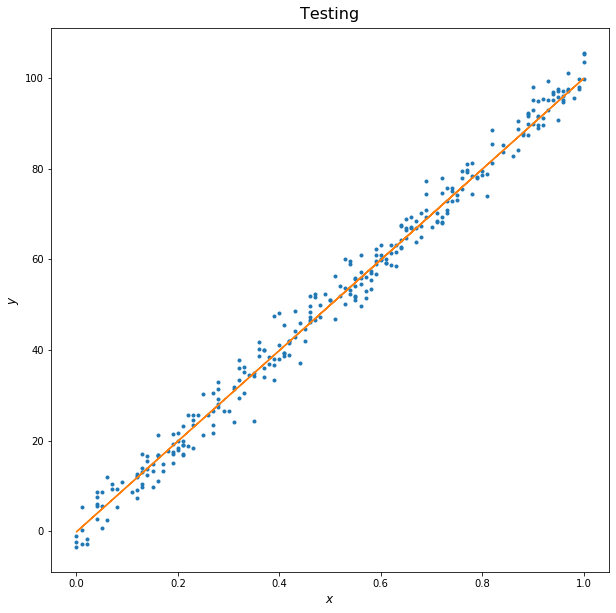

The Loss from Scikit Model is 
0.33364750142473537


In [193]:
y_test_predicted = Reg.predict(x_test)
Plot(x_test,y_test_predicted,y_test,"Testing",False)

print("The Loss from Scikit Model is ")
print(Loss(y_test_predicted,y_test))

# Dataset 2 
\[[Housing dataset](https://www.kaggle.com/dmvreddy91/usahousing)] with multivariables below as varying the House price 


Columns
* Avg. Area Income
* Avg. Area House Age
* Avg. Area Number of Rooms
* Avg. Area Number of Bedrooms
* Area Population
* Price -- Predicted Outcome
* Address  -- Ignored due to the string data

In [194]:
!kaggle datasets download -d dmvreddy91/usahousing

usahousing.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
# Unzip to obtain Data
zip_file = ZipFile('/content/usahousing.zip')

#Creating a dataframe from the .csv file
dataframe = pd.read_csv(zip_file.open('USA_Housing.csv'))
dataframe.dropna()      # drop the data eith nan values in the dataset

columns = dataframe.columns
names = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']
#taking only useful colunms
for i in names:
    dataframe[i] = (dataframe[i] - min(dataframe[i])) / (max(dataframe[i]) - min(dataframe[i]))

x_data = dataframe.drop(['Price','Address'],axis = 1).to_numpy()
y_data =dataframe['Price'].to_numpy()


## Creating the Train and Test Data

In [0]:
x_train, x_test,y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,random_state = 25) 

# Normalize the Data Here and check

x_train = np.column_stack((np.ones(len(y_train)), x_train))
x_test = np.column_stack((np.ones(len(y_test)), x_test))

y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

## Evaluating the code against scikit-learn model

Iteration: 1, Loss = 30315685915.73803
Iteration: 26, Loss = 20771012362.02067
Iteration: 51, Loss = 20577874260.878185
Iteration: 76, Loss = 20511800700.08003
Iteration: 101, Loss = 20478436822.845314
Iteration: 126, Loss = 20458312579.4339
Iteration: 151, Loss = 20444851992.781235
Iteration: 176, Loss = 20435215436.42762
Iteration: 201, Loss = 20427976033.395805
Iteration: 226, Loss = 20422338268.202873
Iteration: 251, Loss = 20417823563.80535
Iteration: 276, Loss = 20414126740.639263
Iteration: 301, Loss = 20411044007.700108
Iteration: 326, Loss = 20408434086.56143
Iteration: 351, Loss = 20406195949.060745
Iteration: 376, Loss = 20404255436.227695
Iteration: 401, Loss = 20402556882.600777
Iteration: 426, Loss = 20401057689.728184
Iteration: 451, Loss = 20399724704.49113
Iteration: 476, Loss = 20398531738.71176


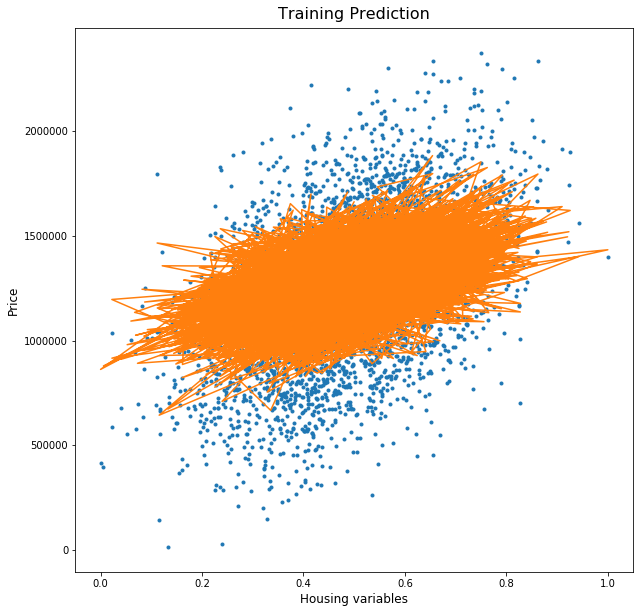

The Loss of our Model from training 0.3503477657324754


In [202]:
lamda=0.01     # learning Rate
alpha = 0
beta = 0
batch_size=1
epoch_num=500

weights_learned = linearRegressionTraining(x_train,y_train, batch_size, lamda, alpha, beta, epoch_num)
pred_output = predictOutput(x_train,weights_learned)

Plot(x_train,pred_output,y_train,"Training Prediction",True,x_label="Housing variables",y_label="Price")
print("The Loss of our Model from training",Loss(y_train,pred_output))

Using the Scikit Model for the Dataset2

In [0]:
x_train, x_test,y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,random_state = 25) 

In [199]:
Reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(1000,)


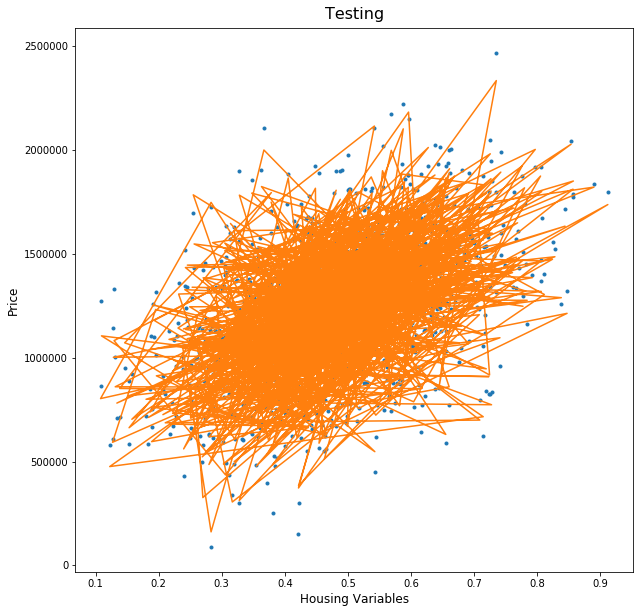

The Loss from the scikit model is 
0.07667623965153161


In [203]:
y_test_predicted = Reg.predict(x_test)

y_test_predicted.reshape(-1,1)

print(y_test_predicted.shape)
Plot(x_test,y_test_predicted,y_test,"Testing",True,"Housing Variables","Price")

print("The Loss from the scikit model is ")
print(Loss(y_test_predicted,y_test))